In [1]:
!pip install wordcloud

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

Standalone Python scripts were used to generate this final 3rdpass_cleaned.tsv that is our final deliverable
for the problem "Can we predict the star rating based on the review body?" Before we attempt to solve that question
we are performing some EDA, SDA, and basic data visualizing. 

In [3]:
third_pass = pd.read_csv('../../3rdpass_cleaned.tsv', sep='\t', quoting=csv.QUOTE_NONE)

In [4]:
# Create another column that holds the length of each review body
third_pass['Review_Body'] = third_pass['Review_Body'].apply(str)
third_pass['Length_Review_Body'] = third_pass['Review_Body'].apply(len)

In [5]:
# Create a column for review date by month 
third_pass['Review_Month_Year'] = third_pass['Review_Date'].apply(lambda x: x[0:7])

In [6]:
third_pass.head()

,Title,Star_Rating,Total_Votes,Review_Body,Review_Date,Length_Review_Body,Review_Month_Year
0,The Book of Life (All Souls),5,0,Love Deborah Harness's Trilogy! Didn't want t...,2015-08-31,174,2015-08
1,CompTIA A+ Certification All-in-One Exam Guide...,5,0,Bought this book for my boyfriend. He said it ...,2015-08-31,118,2015-08
2,The Encyclopedia of Infant and Toddlers Activi...,5,0,Excellent resource.,2015-08-31,19,2015-08
3,Pearson Reviews & Rationales: Medical-Surgical...,5,0,This was very helpful for my Med-Surg class! I...,2015-08-31,191,2015-08
4,Forming Intentional Disciples: The Path to Kno...,5,0,This book inspired me not to nly looke at my o...,2015-08-31,245,2015-08


In [7]:
# Basic describe. Notably most reviews have a star rating of 5 
third_pass.describe()

,Star_Rating,Total_Votes,Length_Review_Body
count,2.668988e+06,2.668988e+06,2.668988e+06
mean,4.548807e+00,2.016235e+00,2.627587e+02
std,9.299195e-01,1.392677e+01,5.752927e+02
min,1.000000e+00,0.000000e+00,1.000000e+00
25%,4.000000e+00,0.000000e+00,6.800000e+01
50%,5.000000e+00,0.000000e+00,1.400000e+02
75%,5.000000e+00,1.000000e+00,2.620000e+02
max,5.000000e+00,4.756000e+03,4.952100e+04


In [8]:
# Of the 2.7 million reviews, almost 2 million are 5's 
third_pass['Star_Rating'].value_counts()

5    1994101
4     366531
3     160601
2      74524
1      73231
Name: Star_Rating, dtype: int64

In [9]:
# Average review length and average total votes for each star rating
third_pass.groupby(['Star_Rating']).mean()

,Total_Votes,Length_Review_Body
Star_Rating,,
1,14.537969,412.209938
2,6.375450,438.537022
3,3.669728,358.287196
4,1.454605,303.058407
5,1.363538,235.599957


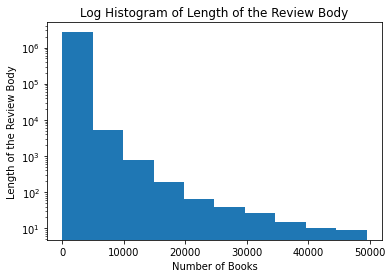

In [10]:
n, bins, patches = plt.hist(third_pass['Length_Review_Body'], log=True)
plt.ylabel('Length of the Review Body')
plt.xlabel('Number of Books')
plt.title('Log Histogram of Length of the Review Body')
plt.show()

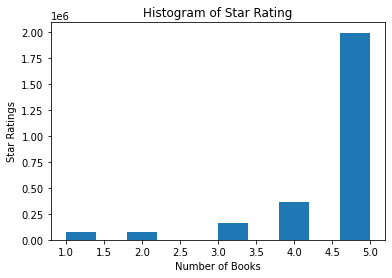

In [11]:
n, bins, patches = plt.hist(third_pass['Star_Rating'])
plt.ylabel('Star Ratings')
plt.xlabel('Number of Books')
plt.title('Histogram of Star Rating')
plt.show()

In [12]:
# How do the trends change over time?
star_by_date = third_pass[['Star_Rating', 'Review_Date']].groupby('Review_Date').mean().reset_index()

In [13]:
star_by_date.head()

,Review_Date,Star_Rating
0,2012-05-03,4.447937
1,2012-05-04,4.332721
2,2012-05-05,4.421659
3,2012-05-06,4.312360
4,2012-05-07,4.325217


In [14]:
# Show average star rating by month over time (instead of by day) 
star_by_month = third_pass[['Star_Rating', 'Review_Month_Year']].groupby('Review_Month_Year').mean().reset_index()

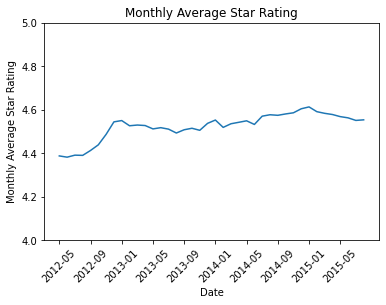

In [15]:
labels = star_by_month['Review_Month_Year'][::4]
plt.plot(star_by_month['Review_Month_Year'], star_by_month['Star_Rating'])
plt.xticks(labels,rotation = 45) 
plt.ylabel("Monthly Average Star Rating")
plt.xlabel("Date")
plt.title("Monthly Average Star Rating")
plt.ylim([4, 5])
plt.show()

In [16]:
# Show average review lenth by month over time
length_by_month = third_pass[['Length_Review_Body', 'Review_Month_Year']].groupby('Review_Month_Year').mean().reset_index()

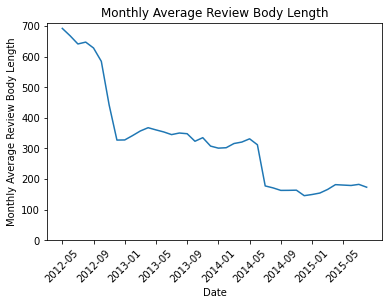

In [17]:
labels = length_by_month['Review_Month_Year'][::4]
plt.plot(length_by_month['Review_Month_Year'], length_by_month['Length_Review_Body'])
plt.xticks(labels,rotation = 45) 
plt.ylabel("Monthly Average Review Body Length")
plt.xlabel("Date")
plt.title("Monthly Average Review Body Length")
plt.ylim([0, 710])
plt.show()

In [18]:
# Show average star rating by month over time (instead of by day) 
total_vote_by_month = third_pass[['Total_Votes', 'Review_Month_Year']].groupby('Review_Month_Year').mean().reset_index()

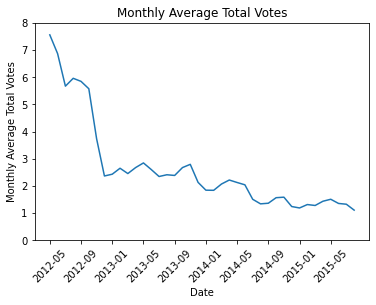

In [19]:
labels = total_vote_by_month['Review_Month_Year'][::4]
plt.plot(total_vote_by_month['Review_Month_Year'], total_vote_by_month['Total_Votes'])
plt.xticks(labels,rotation = 45) 
plt.ylabel("Monthly Average Total Votes")
plt.xlabel("Date")
plt.title("Monthly Average Total Votes")
plt.ylim([0, 8])
plt.show()

In [20]:
list_of_strings = third_pass.head(1000)['Review_Body'].tolist()
text = ' '.join(list_of_strings)

In [21]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [22]:
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', 
                      colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(text)

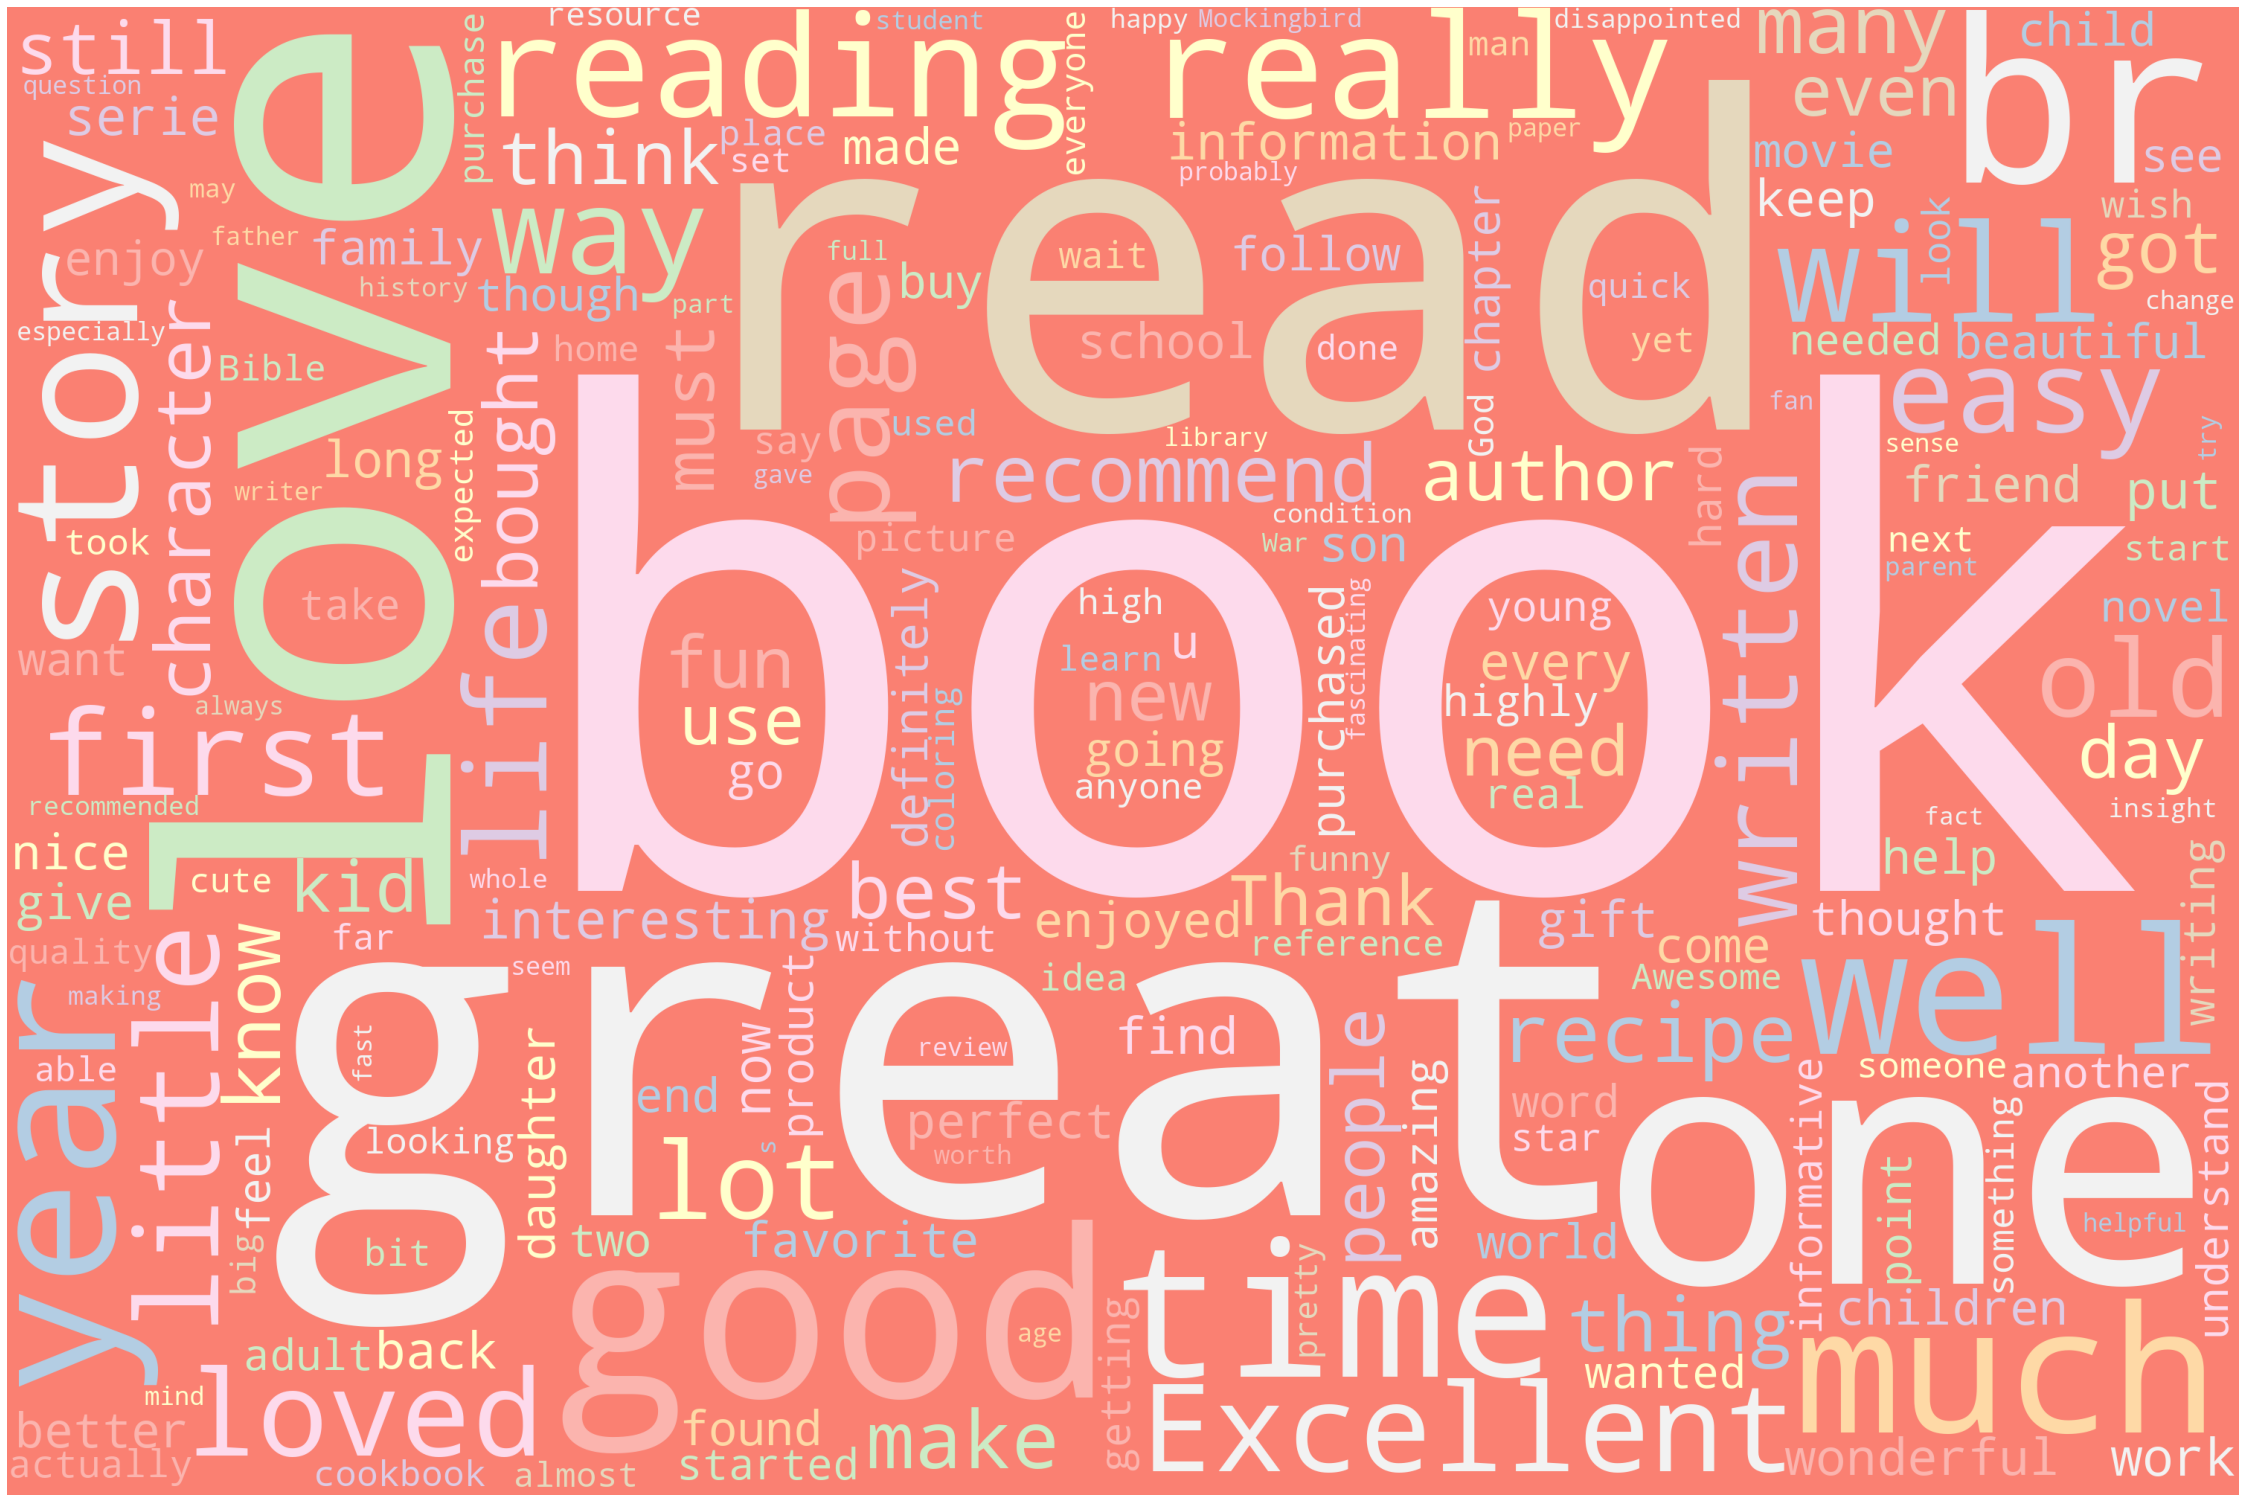

In [23]:
# Plot - from this plot we know that we need to remove breaks from the text 
plot_cloud(wordcloud)